In [202]:
# an online bookstore is hiring us for sales analysis, 
# they are providing a list of the 50 best sales books per year
# the data is in the provided "books.csv" file
# Please include your answer for each question in a single JupyterNB cell, 
# do not answer to more than one question in a cell

In [43]:
# a- load the data
import pandas as pd
df = pd.read_csv("books.csv")
#df.shape
df.head(20)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [44]:
# b- verify the types of data in each column, 
# and store the columns names in a list called "mycol"

#df.info() (this function is more informative, however is used the below one to be more concise)
print(df.dtypes)
mycol=['Name','Author','User Rating','Reviews','Price','Year','Genre']

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


In [45]:
# c- print a quick overview on the data statistics, and check if any 
# values are missing, if you find anomalities clean the data 
# by simply erasing the concerned rows

print(df.describe())
print("\n Are there missing values ?",df.isnull().any().any())

# I noticed from the below table that some records has price 0, which could be an anomaly
# However i wont consider them as anomalies, since they may put price 0 for free book or in special offer.
# anyway, the below function will get rid of rows with price 0. if we want to consider them as anomalies
#df.drop(df[df['Price'] < 1].index, inplace = True)  
#print("\n after deleting the rows with price 0 \n",df.describe())

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

 Are there missing values ? False


In [48]:
# d- how many genre of books the data contains store those 
# in a list named "genre"
pd.unique(df['Genre'].values.ravel())

array(['Non Fiction', 'Fiction'], dtype=object)

In [201]:
# e- display the book rows with the most expensive price
MostExpensivePrice = df[df['Price']==df.Price.max()]
print(MostExpensivePrice)

# they are just two rows, but because the name is so long, the index repeated two times

                                                 Name  \
69  Diagnostic and Statistical Manual of Mental Di...   
70  Diagnostic and Statistical Manual of Mental Di...   

                              Author  User Rating  Reviews  Price  Year  \
69  American Psychiatric Association          4.5     6679    105  2013   
70  American Psychiatric Association          4.5     6679    105  2014   

          Genre  price_is_high  
69  Non Fiction              1  
70  Non Fiction              1  


In [89]:
# f - Count how many books you have per genre
#creating a cross table to show number of books per genere
booksPerGenre = pd.crosstab(df.Genre, columns='count', margins=True)
booksPerGenre

col_0,count,All
Genre,,
Fiction,240,240
Non Fiction,310,310
All,550,550


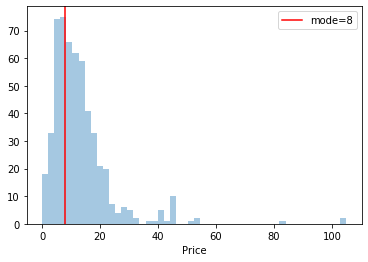

In [104]:
# g - Plot the distribution of the prices and identify the most frequent price

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.distplot(df.Price, bins=50, kde=False)
mode=int(df.Price.mode())
plt.axvline(x=mode, color='red', label='mode=8')

plt.legend(loc='upper right')

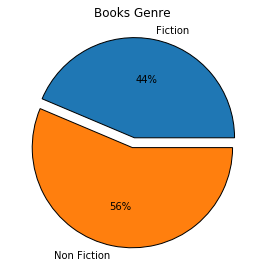

In [120]:
# h - plot a pie chart with genres

slices = [240, 310]
labels = ['Fiction', 'Non Fiction']
explode=[0.1,0]
plt.pie(slices,labels=labels,explode=explode,autopct='%1.0f%%' ,wedgeprops={'edgecolor':'black'})

plt.title("Books Genre")
plt.tight_layout()
plt.show()

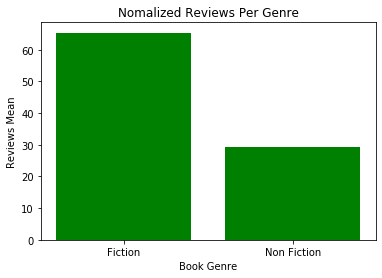

In [188]:
# i- we'd like to know if any genre is reviewed more than others
# so we will plot the mean reviews per genre nomalized (meaning divided)
# by the number of books in each category
fiction= df[df['Genre']=='Fiction'].copy()
NonFiction =  df[df['Genre']=='Non Fiction'].copy()

fiction.Reviews.mean=fiction.Reviews.mean()/240
NonFiction.Reviews.mean=NonFiction.Reviews.mean()/310

x = ['Fiction', 'Non Fiction']
data = [fiction.Reviews.mean,NonFiction.Reviews.mean]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, data, color='green')
plt.xlabel("Book Genre")
plt.ylabel("Reviews Mean")
plt.title("Nomalized Reviews Per Genre")

plt.xticks(x_pos, x)

plt.show()

#Fiction books get more than double mean reviews than Non-fiction

In [176]:
# j - Caclulate the mean values of user rating, reviews and price for each 
# genre category


print("fiction user-rating mean",fiction['User Rating'].mean())
print("Non fiction user-rating mean",NonFiction['User Rating'].mean())

print("\nfiction Reviews mean",fiction['Reviews'].mean())
print("Non fiction Reviews mean",NonFiction['Reviews'].mean())

print("\nfiction Price mean",fiction['Price'].mean())
print("Non fiction Price mean",NonFiction['Price'].mean())




fiction user-rating mean 4.648333333333326
Non fiction user-rating mean 4.595161290322579

fiction Reviews mean 15683.791666666666
Non fiction Reviews mean 9065.145161290322

fiction Price mean 10.85
Non fiction Price mean 14.841935483870968


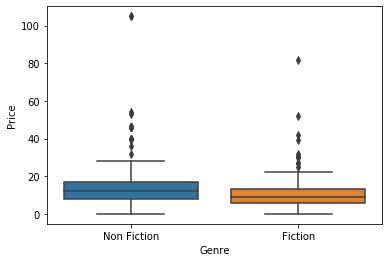

In [155]:
# k - Use 2 different tools to anlyse if there is any price difference between 
# the different book genres
sns.boxplot(x='Genre', y='Price', data=df)

# I was confused by "using 2 different tool", whether you meant to estimator (like mean and median). 
#or like(graph and crosstab)

# so i went with boxplot since it covers all possible meaning (a graph showing the whole info about each genre)
# as the graph show, no significant difference between the genres prices (based on median and IQR and the fences)

Cheap books revies mean: 12176.254752851712
Expensive books revies mean: 7066.458333333333


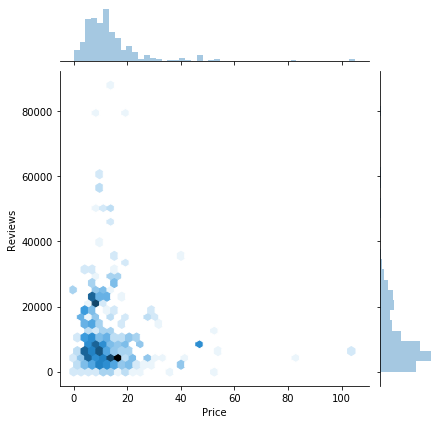

In [200]:
# l - is there a link between price of books and the reviews?
# Answer using 2 different methods, one of those is visual
sns.jointplot(df.Price, df.Reviews, kind="hex")


Cheap= df[df['Price']<35].copy()
Expensive =  df[df['Price'] >= 35].copy()
print("Cheap books revies mean:", Cheap.Reviews.mean())
print("Expensive books revies mean:", Expensive.Reviews.mean())

# as the graph and the means show, books with lower prices (relativaly cheap) get more reviews

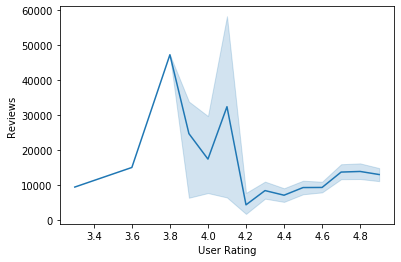

In [172]:
# m - Answer this question with a visual support and a small explanation 
# comment, do the books with higher rating have less number of reviews?  
# or is it the opposite?
sns.lineplot(x="User Rating", y="Reviews", data=df, ci=95)


#yes, books with higher rating (4.2 and above) have less number of reviews
# it's weired, maybe because books with less rating are more controversial

Mohamad-Kazem Al-Seblani 213114